In [1]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [15]:
import tensorflow as tf

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 20s 12ms/step - loss: 0.5926 - accuracy: 0.7906 - val_loss: 0.8700 - val_accuracy: 0.7150
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5584 - accuracy: 0.8020 - val_loss: 0.9093 - val_accuracy: 0.7055
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5308 - accuracy: 0.8114 - val_loss: 0.9420 - val_accuracy: 0.6960
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4987 - accuracy: 0.8244 - val_loss: 0.9526 - val_accuracy: 0.7006
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4762 - accuracy: 0.8308 - val_loss: 0.9648 - val_accuracy: 0.7051
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4473 - accuracy: 0.8412 - val_loss: 1.0007 - val_accuracy: 0.7018
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4253 - accuracy: 0.8498 - val_loss: 1.0444 -

313/313 - 1s - loss: 1.1617 - accuracy: 0.6987 - 1s/epoch - 4ms/step
Test accuracy: 0.6987000107765198


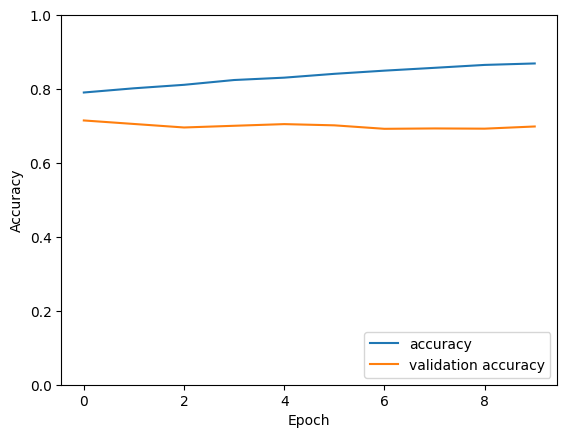

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


In [17]:
import pickle
import tensorflow as tf

# Assuming 'model' is your trained Keras model
model.save('my_model.h5')  # Saving the model in HDF5 format

# If you really want to use pickle (not recommended for TensorFlow models)
# It's better to use TensorFlow's built-in saving mechanism
# But for educational purposes, here's how you'd do it with pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [18]:
import os
print(os.getcwd())


/Users/ranyarhazi


In [19]:
print(os.path.abspath("my_model.h5"))

/Users/ranyarhazi/my_model.h5


In [20]:
import h5py

f = h5py.File('my_model.h5', 'r')
print(list(f.keys()))  # This will give you an overview of the contents of the file
f.close()

['model_weights', 'optimizer_weights']
